DATA ANALYSIS OF THE GIVEN DATA FIRST

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Looking through the data

In [280]:
df=pd.read_csv('Train.csv')
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Checking how the null values look

In [282]:
rows_NaN=df.isnull().any(axis=1)
Empty_rows=df[rows_NaN]
Empty_rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


<Axes: xlabel='Item_Fat_Content', ylabel='count'>

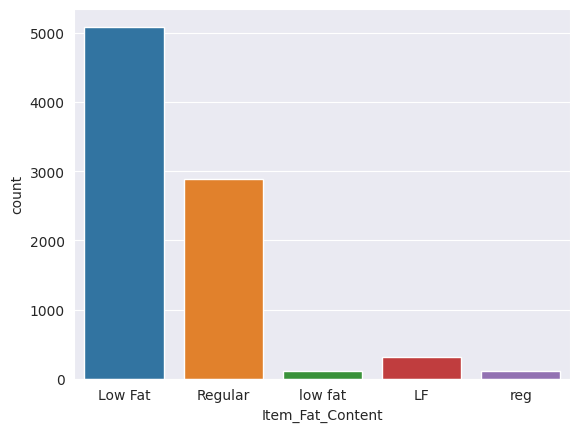

In [283]:
sns.countplot(x='Item_Fat_Content',data=df)

In [284]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [285]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

Now we are looking at the consumption based on fat

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

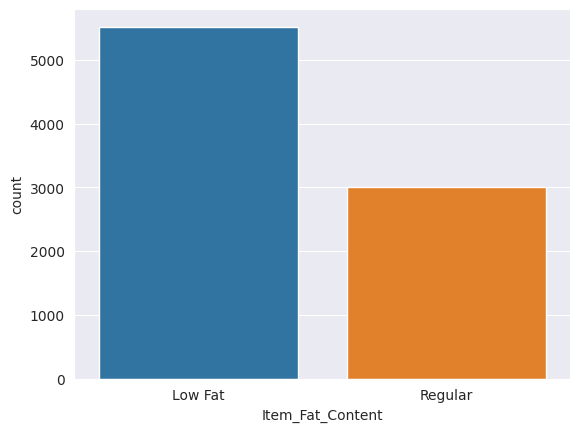

In [286]:
sns.countplot(x='Item_Fat_Content',data=df)

Looking into ITEM TYPE NOW


In [287]:
print(df.Item_Type.unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [288]:
count_sales=df['Item_Type'].value_counts()
Item_type_sales=pd.DataFrame(count_sales)
Item_type_sales

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [289]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [290]:
print(df.Outlet_Identifier.unique(),df.Outlet_Size.unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] ['Medium' nan 'High' 'Small']


In [291]:
df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

Now I am looking into which of the outlet has the highest MRP selling

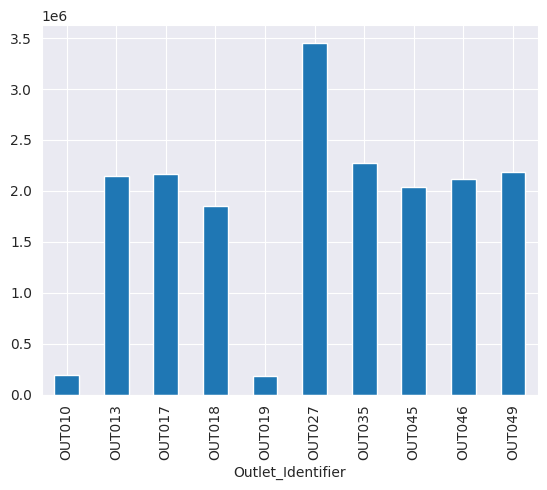

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: Item_Outlet_Sales, dtype: float64


In [292]:
mrp_sum_by_outlet= df.groupby('Outlet_Identifier',sort=True)['Item_Outlet_Sales'].sum()
mrp_sum_by_outlet.plot(kind='bar')
plt.show()
print(mrp_sum_by_outlet)

Lets now see how the size of the outlet impact on its 

In [293]:
Year_size=df[['Outlet_Establishment_Year','Outlet_Identifier']]
Year_Size_Unique=Year_size.drop_duplicates().reset_index(drop=True)


Identifier_size=df[['Outlet_Identifier','Outlet_Size']]
Identifier_Size_Unique=Identifier_size.drop_duplicates().reset_index(drop=True)

Year_Size_Unique.head(10)

,Outlet_Establishment_Year,Outlet_Identifier
0,1999,OUT049
1,2009,OUT018
2,1998,OUT010
3,1987,OUT013
4,1985,OUT027
5,2002,OUT045
6,2007,OUT017
7,1997,OUT046
8,2004,OUT035
9,1985,OUT019


In [294]:

size_sale=pd.DataFrame(mrp_sum_by_outlet)
size_sale.reset_index(inplace=True)

size_sale['Item_Outlet_Sales'] = size_sale['Item_Outlet_Sales'].apply(lambda x: x / 1000000)

Outlet_Size=pd.DataFrame(Identifier_Size_Unique)

size_sale

,Outlet_Identifier,Item_Outlet_Sales
0,OUT010,0.188340
1,OUT013,2.142664
2,OUT017,2.167465
3,OUT018,1.851823
4,OUT019,0.179694
5,OUT027,3.453926
6,OUT035,2.268123
7,OUT045,2.036725
8,OUT046,2.118395
9,OUT049,2.183970


In [295]:
size_sale= size_sale.merge(Year_Size_Unique,how='inner')
size_sale =size_sale.merge(Outlet_Size,how='inner')


#For this sake I am chaning NaN to Unknown

size_sale

,Outlet_Identifier,Item_Outlet_Sales,Outlet_Establishment_Year,Outlet_Size
0,OUT010,0.188340,1998,NaN
1,OUT013,2.142664,1987,High
2,OUT017,2.167465,2007,NaN
3,OUT018,1.851823,2009,Medium
4,OUT019,0.179694,1985,Small
5,OUT027,3.453926,1985,Medium
6,OUT035,2.268123,2004,Small
7,OUT045,2.036725,2002,NaN
8,OUT046,2.118395,1997,Small
9,OUT049,2.183970,1999,Medium


In [297]:
size_sale['Outlet_Size'].fillna('Unknown', inplace=True)

size_sale.head(15)


,Outlet_Identifier,Item_Outlet_Sales,Outlet_Establishment_Year,Outlet_Size
0,OUT010,0.188340,1998,Unknown
1,OUT013,2.142664,1987,High
2,OUT017,2.167465,2007,Unknown
3,OUT018,1.851823,2009,Medium
4,OUT019,0.179694,1985,Small
5,OUT027,3.453926,1985,Medium
6,OUT035,2.268123,2004,Small
7,OUT045,2.036725,2002,Unknown
8,OUT046,2.118395,1997,Small
9,OUT049,2.183970,1999,Medium


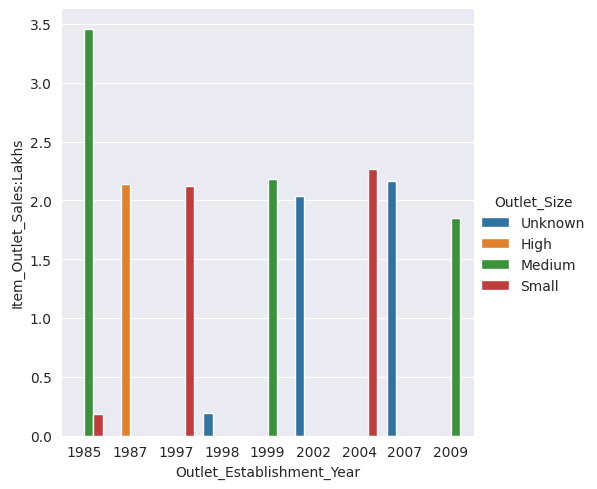

In [298]:
sns.catplot(kind='bar',data=size_sale,hue='Outlet_Size',x='Outlet_Establishment_Year',y='Item_Outlet_Sales')
plt.ylabel('Item_Outlet_Sales:Lakhs')
sns.set_style('darkgrid')

Here, we kinda get the idea, the oldest Medium size is doing the best bussiness, otherwise we cant recally conclude anything .